In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statsmodels.formula.api as smf 

In [2]:
data = pd.read_csv('salary.csv')
# data= data.drop('instance_no', axis=1)
data.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [3]:
data.shape

(47, 6)

In [4]:
data.columns

Index(['sx', 'rk', 'yr', 'dg', 'yd', 'sl'], dtype='object')

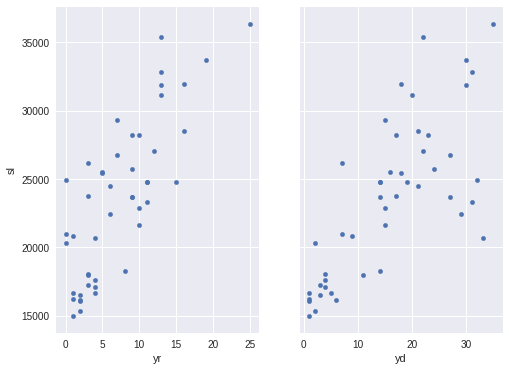

In [5]:
# visualize the relationship between the features and the response using scatterplots
# first, include only numeric features:
fig, axs = plt.subplots(1, 2, sharey=True)
data.plot(kind='scatter', x='yr', y='sl', ax=axs[0], figsize=(8, 6))
data.plot(kind='scatter', x='yd', y='sl', ax=axs[1])

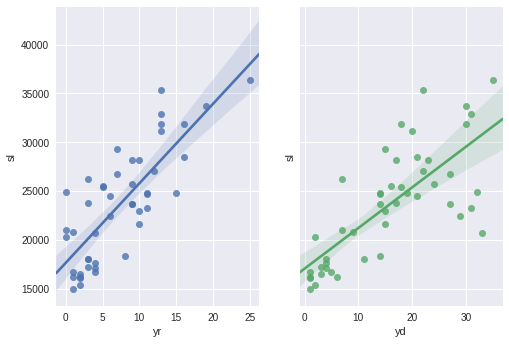

In [6]:
# visualize the relationship between the features and the response using scatterplots
# first, include only numeric features:
fig, axs = plt.subplots(1, 2, sharey=True)
scat1 = sns.regplot(x=data['yr'], y=data['sl'], scatter=True, ax=axs[0], order=1)
scat2 = sns.regplot(x=data['yd'], y=data['sl'], scatter=True, ax=axs[1], order=1)

In [7]:
reg1 = smf.ols('sl ~ yr+yd', data=data).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                     sl   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     58.54
Date:                Tue, 02 May 2017   Prob (F-statistic):           3.99e-13
Time:                        13:44:35   Log-Likelihood:                -442.70
No. Observations:                  47   AIC:                             891.4
Df Residuals:                      44   BIC:                             896.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.612e+04    838.168     19.232      0.0

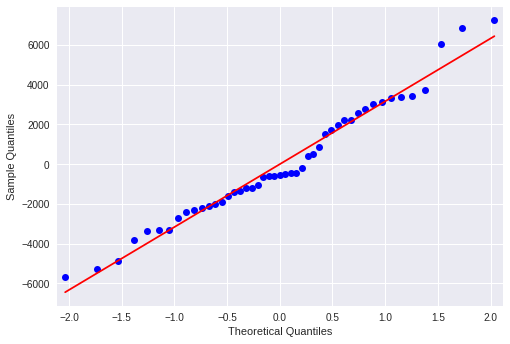

In [8]:
# Normality of the residuals is checked with a q-q plot:
import statsmodels.api as sm
fig1=sm.qqplot(reg1.resid, line='r')

In [9]:
# interpretation of the above q-q plot: the residuals do not follow a perfect normal distribution,
# there might be other explanatory variables that could improve our estimation!

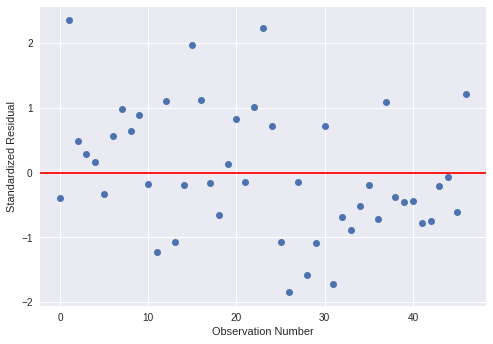

In [10]:
# simple plot of residuals
stdres=pd.DataFrame(reg1.resid_pearson) # resid_pearson: standardized redisuals - N~(0,1)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

# Improve the model by incorporating caretgorical variables

# Handling Categorical Predictors with Two Categories :'sx' column

In [11]:
print(data.sx.value_counts())

male      34
female    13
Name: sx, dtype: int64


In [12]:
# create a new Series called IsLarge
data['IsMale'] = data.sx.map({'male':1, 'female':0})
data.head()

,sx,rk,yr,dg,yd,sl,IsMale
0,male,full,25,doctorate,35,36350,1
1,male,full,13,doctorate,22,35350,1
2,male,full,10,doctorate,23,28200,1
3,female,full,7,doctorate,27,26775,0
4,male,full,19,masters,30,33696,1


In [13]:
data.drop('sx', axis=1, inplace=True)
data.head()

,rk,yr,dg,yd,sl,IsMale
0,full,25,doctorate,35,36350,1
1,full,13,doctorate,22,35350,1
2,full,10,doctorate,23,28200,1
3,full,7,doctorate,27,26775,0
4,full,19,masters,30,33696,1


In [14]:
# another two-category variable:
print(data.dg.value_counts())

doctorate    31
masters      16
Name: dg, dtype: int64


In [15]:
data['IsMasters'] = data.dg.map({'masters':1, 'doctorate':0})
data.drop('dg', axis=1, inplace=True)
data.head()

,rk,yr,yd,sl,IsMale,IsMasters
0,full,25,35,36350,1,0
1,full,13,22,35350,1,0
2,full,10,23,28200,1,0
3,full,7,27,26775,0,0
4,full,19,30,33696,1,1


In [16]:
print(data.rk.value_counts())

full         18
assistant    17
associate    12
Name: rk, dtype: int64


## Handling Categorical Predictors with More than Two Categories:

In [17]:
# create three dummy variables using get_dummies, then exclude the first dummy column
rk_dummies = pd.get_dummies(data.rk, prefix='rk').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, rk_dummies], axis=1)
data.drop('rk', axis=1, inplace=True)
data.head()

,yr,yd,sl,IsMale,IsMasters,rk_associate,rk_full
0,25,35,36350,1,0,0,1
1,13,22,35350,1,0,0,1
2,10,23,28200,1,0,0,1
3,7,27,26775,0,0,0,1
4,19,30,33696,1,1,0,1


In [18]:
reg2 = smf.ols('sl ~ yr+yd+IsMale+IsMasters+rk_associate+rk_full', data=data).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                     sl   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     65.54
Date:                Tue, 02 May 2017   Prob (F-statistic):           3.89e-19
Time:                        13:44:43   Log-Likelihood:                -417.21
No. Observations:                  47   AIC:                             848.4
Df Residuals:                      40   BIC:                             861.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     1.614e+04    662.327     24.369   

In [19]:
# exclude the variables whose p values are above alfa= 0.05:
reg2 = smf.ols('sl ~ yr+IsMasters+rk_associate+rk_full', data=data).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                     sl   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     96.61
Date:                Tue, 02 May 2017   Prob (F-statistic):           1.31e-20
Time:                        13:44:45   Log-Likelihood:                -418.61
No. Observations:                  47   AIC:                             847.2
Df Residuals:                      42   BIC:                             856.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     1.599e+04    512.798     31.180   

In [29]:
# Regression using sklearn

In [20]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

/home/ayla/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
data.columns

Index(['yr', 'yd', 'sl', 'IsMale', 'IsMasters', 'rk_associate', 'rk_full'], dtype='object')

In [22]:
regr = linear_model.LinearRegression()

In [23]:
# separate features and the response variable:
X= data[['yr', 'yd','IsMale', 'IsMasters', 'rk_associate', 'rk_full']]
y= data['sl']

In [24]:
# Do not train the model with all your data in order to avoid overfitting!
# * create train and test splits or
# * apply cross validation, which performs partitioning multiple times and returns average results

In [25]:
# create train and test partitions.
# train_test_split function returns 4 partitions:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42) # random_state optional

In [26]:
# Fit linear model:
regr.fit(X_train, y_train) 

print('Coefficients: \n', regr.coef_)
print('The intercept: \n', regr.intercept_)

Coefficients: 
 [   446.38462334    -97.92622772    215.55765812   2063.86303153
   4297.2544519   10154.66275787]
The intercept: 
 16079.3056015


In [27]:
# Now, evaluate the model's performance using the test data:
# Do not include your train data!
from sklearn.metrics import mean_squared_error
print("Mean_squared_error: %.2f" % mean_squared_error(y_test, regr.predict(X_test)))

from sklearn.metrics import r2_score # R² score, the coefficient of determination
print("r2_score: %.2f" % r2_score(y_test, regr.predict(X_test)))

Mean_squared_error: 3414878.58
r2_score: 0.87


In [28]:
# Evaluation on the test set is useful, but it may not be enough!
# As the model gains knowledge about your test set, your evaluation metrics may no longer report 
# on the generalized performance of the model! 

# Cross validaton (CV) selects different test partitions each time and returns averages

In [29]:
# Apply CV, and see the averaged results:
# create different models
from sklearn.model_selection import cross_val_score
regr1 = linear_model.LinearRegression()

scoresMSE= cross_val_score(regr1, X, y, cv=5, scoring='neg_mean_squared_error') #  5-fold cross validation. 
print("Negative Mean Squared Errors: "+ str(list(scoresMSE)))
print('Mean:%.2f' %scoresMSE.mean())

scoresR2= cross_val_score(regr1, X, y, cv=5, scoring='r2') #  5-fold cross validation. 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())

# sklearn.metrics.r2_score:
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, disregarding the input features, 
# would get a R^2 score of 0.0.

Negative Mean Squared Errors: [-10133062.004847897, -7290881.7324870722, -5603787.3358784029, -1101854.4935332416, -2869132.8047188278]
Mean:-5399743.67
R2 scores: [0.21351520080484188, -0.15296704126237914, -0.87883982087779633, 0.69434991582881733, -0.37101935077980319]
r2_score: -0.10


In [29]:
# try other models:
# exclude Ismale
X= data[['yr', 'yd','IsMasters', 'rk_associate', 'rk_full']]
y= data['sl']

regr2 = linear_model.LinearRegression()

scoresMSE= cross_val_score(regr2, X, y, cv=5, scoring='neg_mean_squared_error') #  5-fold cross validation. 
print("Negative Mean Squared Errors: "+ str(list(scoresMSE)))
print('Mean:%.2f' %scoresMSE.mean())

scoresR2= cross_val_score(regr2, X, y, cv=5, scoring='r2') #  5-fold cross validation. 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())

Negative Mean Squared Errors: [-10134911.389093384, -7297179.2983134929, -5603791.9561503101, -1086693.9082420354, -2831165.2045511524]
Mean:-5390748.35
R2 scores: [0.21337165953407389, -0.15396292709683035, -0.87884136996421258, 0.69855540230415269, -0.35287647693062474]
r2_score: -0.09


In [30]:
# exclude Ismale avd IsMasters
X= data[['yr', 'yd', 'rk_associate', 'rk_full']]
y= data['sl']

regr3 = linear_model.LinearRegression()

scoresMSE= cross_val_score(regr3, X, y, cv=5, scoring='neg_mean_squared_error') #  5-fold cross validation. 
print("Negative Mean Squared Errors: "+ str(list(scoresMSE)))
print('Mean:%.2f' %scoresMSE.mean())

scoresR2= cross_val_score(regr3, X, y, cv=5, scoring='r2') #  5-fold cross validation. 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())

Negative Mean Squared Errors: [-10604942.994737923, -4845975.1005310845, -6511935.3783237487, -937640.28057656751, -3022833.9416942638]
Mean:-5184665.54
R2 scores: [0.17688982286872412, 0.23366613549709059, -1.1833240211389531, 0.73990228985541351, -0.44446566622522266]
r2_score: -0.10


In [31]:
# Recursive feature elimination with cross-validation:
# automatic tuning of the number of features selected with cross-validation.

In [32]:
X= data[['yr', 'yd','IsMale', 'IsMasters', 'rk_associate', 'rk_full']]
y= data['sl']

In [33]:
import matplotlib.pyplot as plt
# recursive feature elimination and cross-validated selection of the best number of features
from sklearn.feature_selection import RFECV

Optimal number of features : 6
Index(['yr', 'yd', 'IsMale', 'IsMasters', 'rk_associate', 'rk_full'], dtype='object')
[ True  True  True  True  True  True]


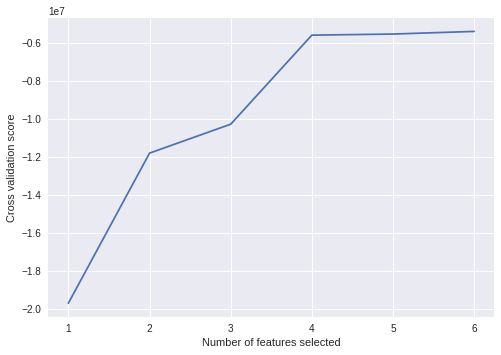

In [34]:
regr = linear_model.LinearRegression()

# The "neg_mean_squared_error" scoring:
rfecv = RFECV(estimator=regr, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
print(X.columns)
print(rfecv.support_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Optimal number of features : 6
[-4.26110427 -1.41220162 -0.90011683 -0.30923001 -0.15142898 -0.09899222]


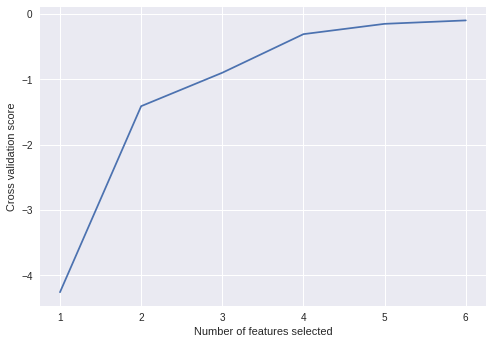

In [92]:
regr = linear_model.LinearRegression()

# The "r2" scoring:
rfecv = RFECV(estimator=regr, step=1, cv=5, scoring='r2')
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.grid_scores_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()